<a href="https://colab.research.google.com/github/Shadman-Rashik/Investigating-ML-algo-for-Breast-Cancer-Prediction/blob/main/ML_BreastCancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd

data="/content/drive/MyDrive/424/data.csv"
df=pd.read_csv(data)


Mounted at /content/drive


In [ ]:
df.head(10)
df.info()
df.isna().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df = df.dropna(axis=1)


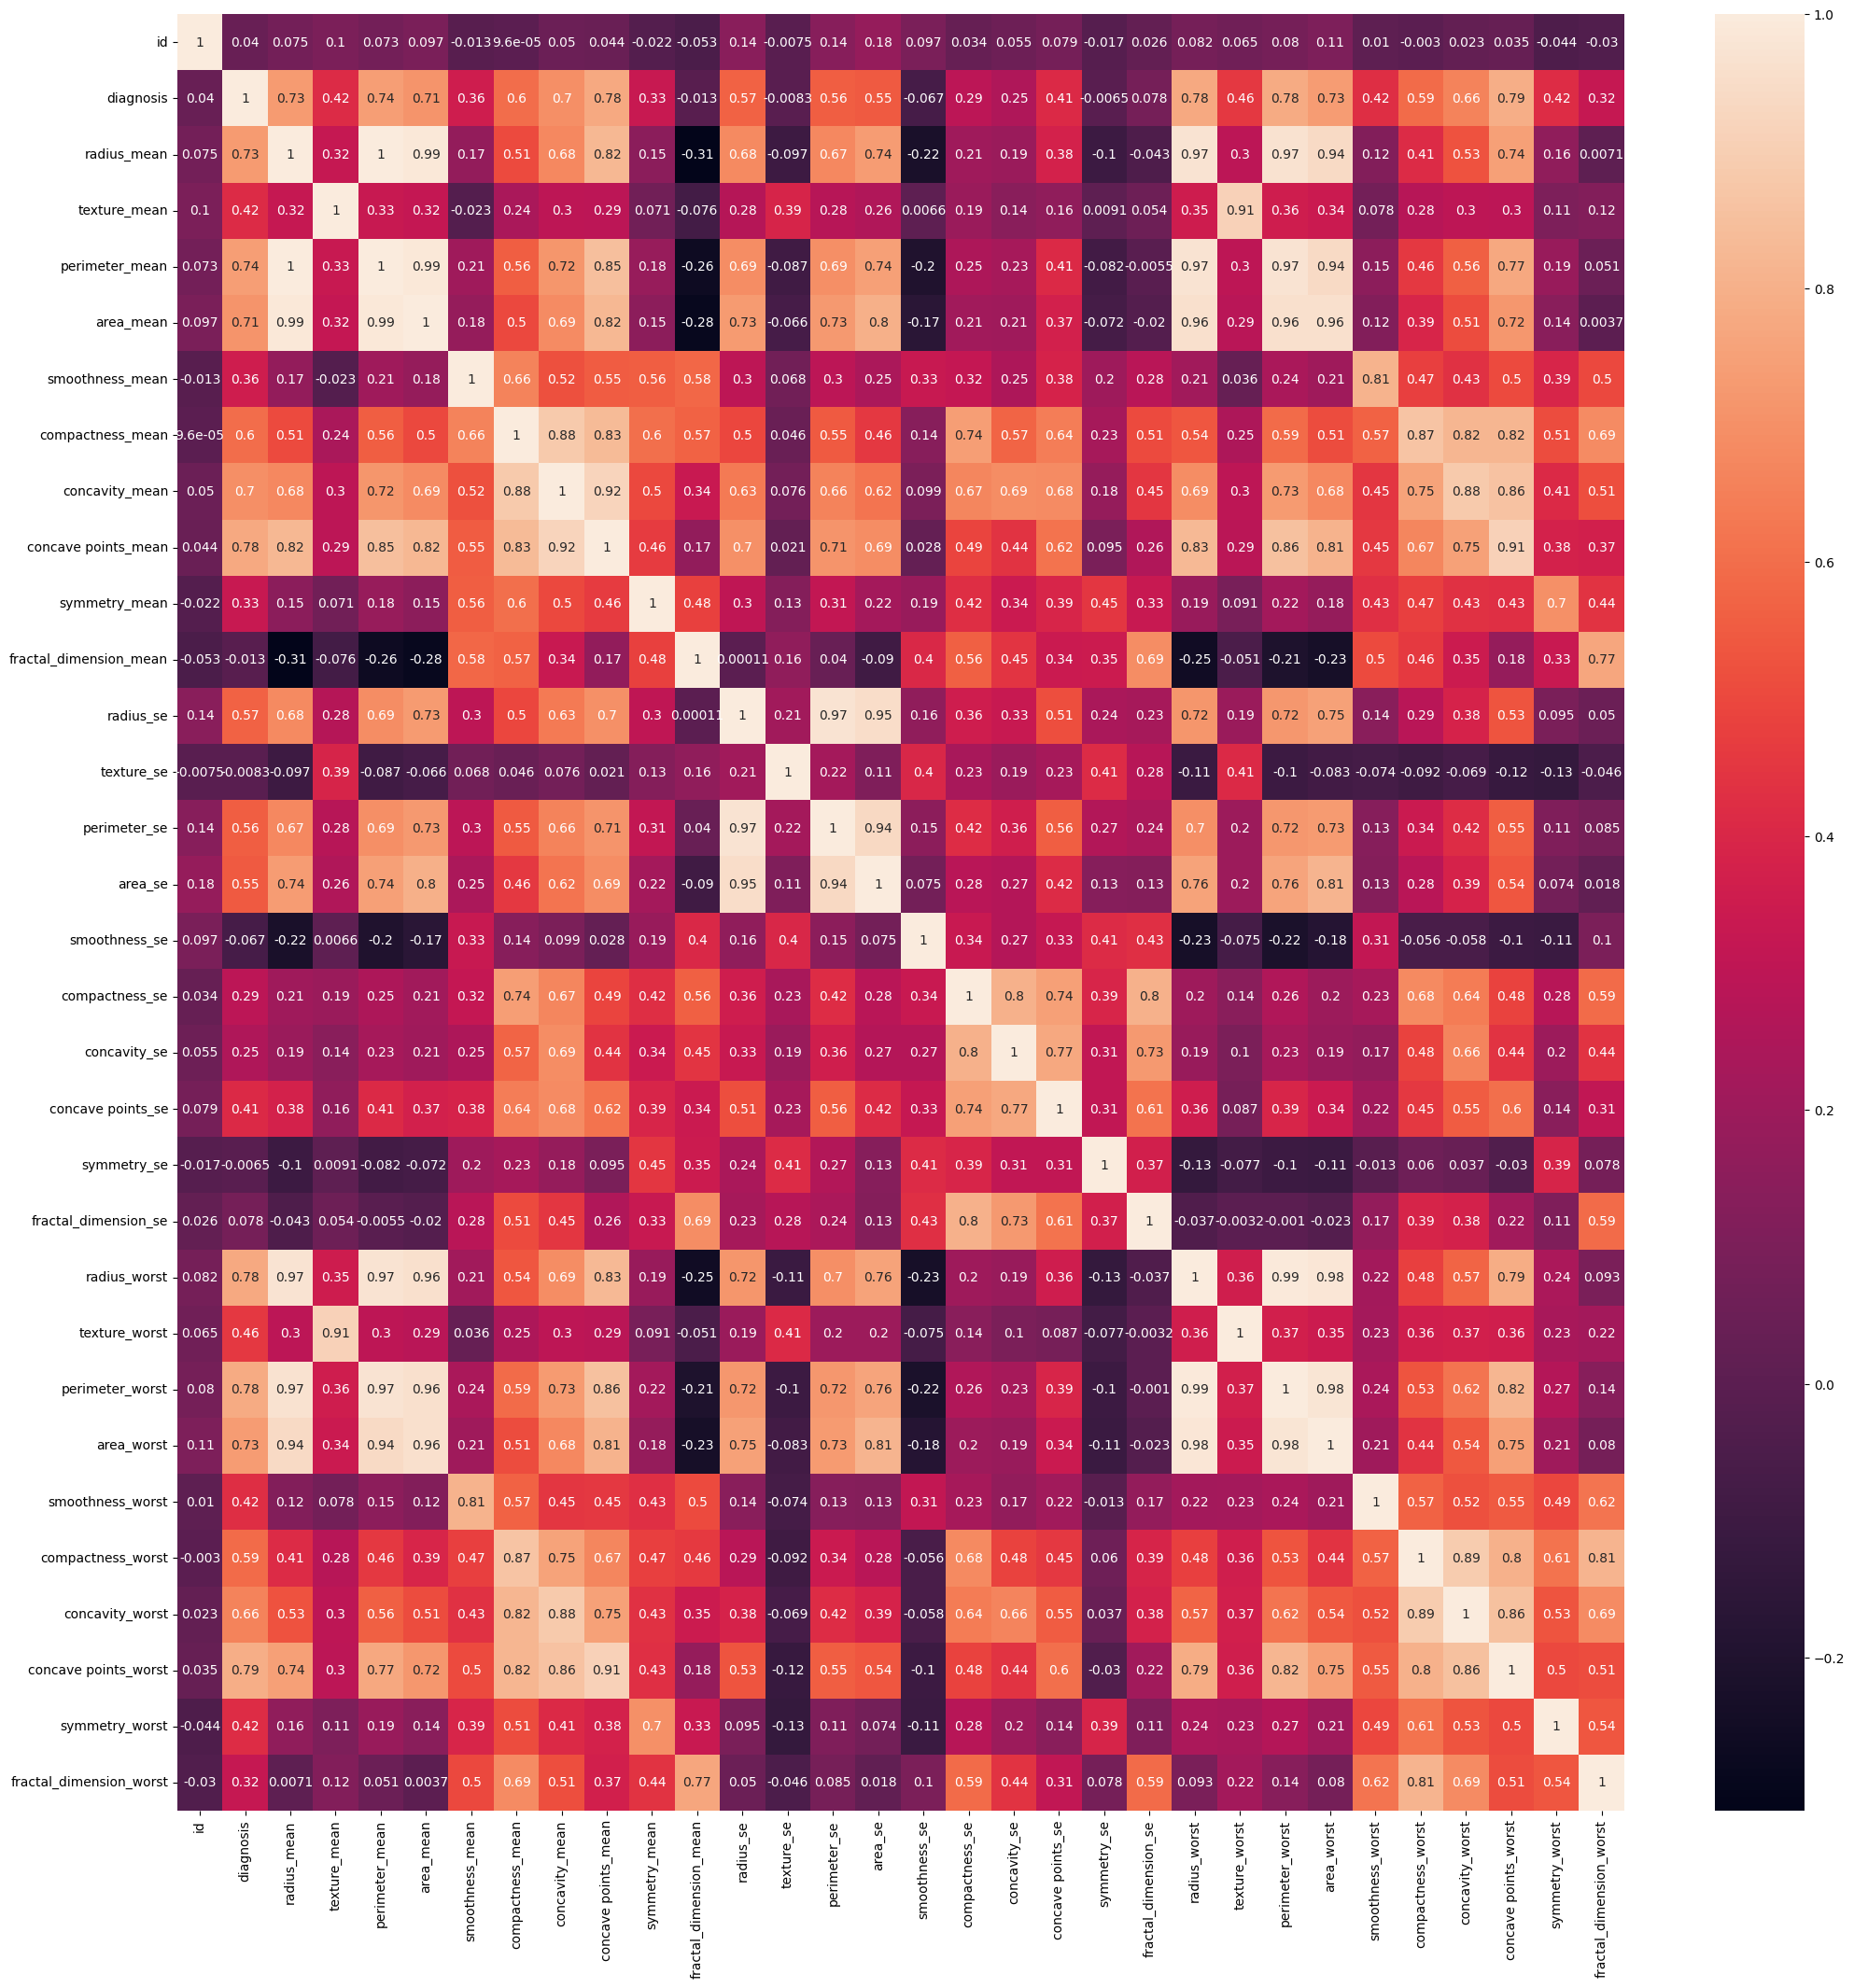

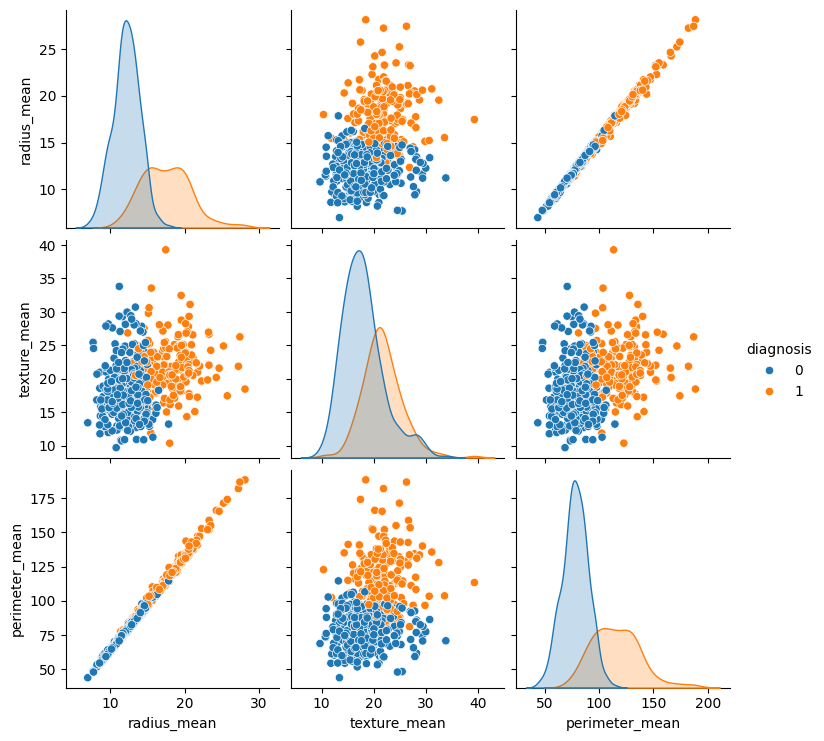

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['diagnosis'] = lb.fit_transform(df['diagnosis'])

import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True)
sns.pairplot(df.iloc[:, 1:5], hue="diagnosis")


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df.iloc[:, 1] = lb.fit_transform(df.iloc[:, 1].values)

X = df.iloc[:, 2:32].values
y = df.iloc[:, 1].values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

# Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
naive_bayes_predictions = naive_bayes_model.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"Logistic Regression Accuracy: {logistic_accuracy}")
print(f"Naive Bayes Accuracy: {naive_bayes_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")


Logistic Regression Accuracy: 0.956140350877193
Naive Bayes Accuracy: 0.9385964912280702
SVM Accuracy: 0.9824561403508771


In [ ]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

print("Naive Bayes Classification Report:")
print(classification_report(y_test, naive_bayes_predictions))

print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99

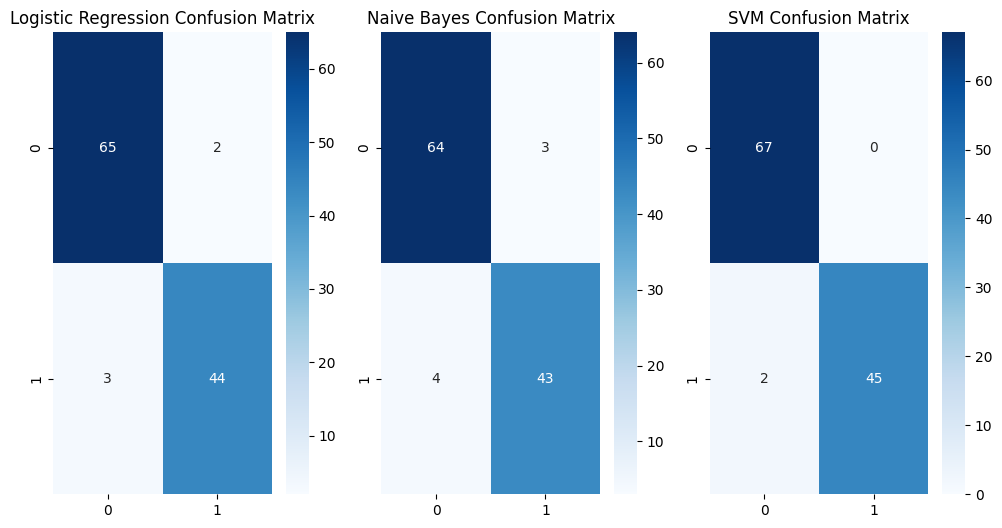

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, logistic_predictions), annot=True, cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, naive_bayes_predictions), annot=True, cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, cmap='Blues')
plt.title('SVM Confusion Matrix')

plt.show()
